# CNN 예제(NNIST, Fashion MNIST)

## <span style="font-size:25px">CNN 구조 => 특징 추출기(Feature Extractor) + 분류기(Classifier)</span>

<img src="picture/TF_img_14_1.png" alt="TF_img_14_1" width=750>

<dl style="font-size:18px">
<dt style="font-size:20px">
▶ 이미지를 분류하기 위해서 사용되는 일반적인 컨볼루션 신경망(CNN) 구조는 
<br>특징 추출기(Feature Extractor)와 분류기(Classifier)가 합쳐져 있는 형태임
</dt>
<br>
<dd>- 특징 분류기(Feature Extractor)는 컨볼루션층(Conv Layer)와 풀링층(Pool Layer)
<br> 등 다양한 조합으로 구성되며, 이미지 데이터의 특징을 추출하고 압축하는 역할 수행
</dd>
<br>
<dd>- 분류기(Classifier) 부분은 완전 연결층인 Dense Layer과 과적합(overfitting)을 방지하기 
<br>위한 Dropout Layer등의 다양한 조합으로 구성되며, 정답을 분류하는 역할 수행
</dd>
</dl>

## <span style="font-size:25px">TensorFlow CNN API</span>

### <span style="font-size:25px">Conv Layer and Pool Layer</span>

<img src="picture/TF_img_14_2.png" alt="TF_img_14_2" width=750>

<table style="font-size:18px">
<tr>
<td style="text-align:center;">    <!--1st-->
Layer
</td>
<td style="text-align:center;">    <!--2ed-->
TensorFlow 2.x API
</td>
<td style="text-align:center;">    <!--3rd-->
Description
</td>
</tr>

<tr>
<td rowspan=2 style="text-align:center;">    <!--1st-->
Conv
</td>
<td>    <!--2ed-->
Conv2D(input_shape=(28, 28, 1), 
<br>&emsp;&emsp;&emsp;&ensp;&nbsp;kernel_size=(3, 3), fiters=32, 
<br>&emsp;&emsp;&emsp;&ensp;&nbsp;strides=(1, 1), activation='relu', 
<br>&emsp;&emsp;&emsp;&ensp;&nbsp;use_bias=True, padding='vaild')
</td>
<td>    <!--3rd-->
CNN에서 1st Conv Layer(①)를 나타내기 위해 
<br>(높이, 너비, 채널) 형태의 텐서로 주어지는 
<br>input_shape를 사용하며, 필터 크기(kernel_size)
<br>필터 개수(filters)는 반드시 기술되어야 함. 필터 
<br>크기는 (높이, 너비) 형태이며 숫자를 하나만 쓸 
<br>경우 높이와 너비가 동일값이라는 것을 의미함
</td>
</tr>

<tr>
<!--<td>1st</td>-->
<td>    <!--2ed-->
Conv2D(kernel_size=(3, 3), fiters=32, 
<br>&emsp;&emsp;&emsp;&ensp;&nbsp;strides=(1, 1), activation='relu', 
<br>&emsp;&emsp;&emsp;&ensp;&nbsp;use_bias=True, padding='vaild')
</td>
<td>    <!--3rd-->
2ed Conv Layer(②)부터 input_shape 사용되지 않음 
<br>필터 크기(kernel_size)와 필터 개수(filters)
<br>값을 지정하고 나머지 파라미터는 기본값만을 
<br>이용하여도 컨벌루션층 구현 가능함
</td>
</tr>

<tr>
<td style="text-align:center;">    <!--1st-->
Pool
</td>
<td>    <!--2ed-->
MaxPool2D(pool_size=(2, 2), 
<br>&emsp;&emsp;&emsp;&emsp;&ensp;&ensp;&nbsp;padding='vaild')
</td>
<td>    <!--3rd-->
한번에 Max Pooling 수행할 범위에 pool_size에 
<br>나타냄. pool_size=(2, 2)라면 높이 2, 너비 2 
<br>사각형 안에서 최댓값만 남기는 연산을 수행함
</td>
</tr>
</table>

### <span style="font-size:25px">Flat Layer, Dense Layer, Dropout Layer</span>

<img src="picture/TF_img_14_2.png" alt="TF_img_14_2" width=750>

<table style="font-size:18px">
<tr>
<td style="text-align:center;">    <!--1st-->
Layer
</td>
<td style="text-align:center;">    <!--2ed-->
TensorFlow 2.x API
</td>
<td style="text-align:center;">    <!--3rd-->
Description
</td>
</tr>

<tr>
<td style="text-align:center;">    <!--1st-->
Flat
</td>
<td>    <!--2ed-->
Flatten()
</td>
<td>    <!--3rd-->
Feature Extractor 출력은 (높이, 너비, 채널)로 
<br>나타나는 3차원 텐서이므로, 완전 연결층(Dense)
<br>과의 연결을 위해서 3차원 텐서를 1차원 vector
<br>로 만들어주는 역할을 수행함
</td>
</tr>

<tr>
<td style="text-align:center;">
Dense
</td>
<td>    <!--2ed-->
Dense(100, activation='relu')
<br>Dense(100, activation='sigmoid')
<br>Dense(10, activation='softmax')
</td>
<td>    <!--3rd-->
Dense 함수는 신경망에서 은닉층과 출력층을 의
<br>미하는 완전 연결층을 나타내며, 1st 파라미터는 
<br>완전 연결층의 출력 노드 수이며, 활성화 함수는 
<br>activation='...' 나타냄
</td>
</tr>

<tr>
<td style="text-align:center;">    <!--1st-->
Dropout
</td>
<td>    <!--2ed-->
Dropout(rate=0.2)
</td>
<td>    <!--3rd-->
학습과정 중에 rate에 저장된 비율만큼 랜덤하게 
<br>층(layer)과 층 사이의 연결을 끊어서 네트워크의 
<br>과적합(overfitting)을 막는 역할을 수행함
</td>
</tr>
</table>

## <span style="font-size:25px">CNN Example - MNIST</span>

In [5]:
# MNIST 데이터 불러오기

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1)        # -1은 차원의 크기를 
                                                # 자동으로 설정함.
                                                # ex. If x_train(60000, 784), 
                                                # -1 => 60000.
x_test = x_test.reshape(-1, 28, 28, 1)          # (batch size를 한번에 몇개를 넣어주는지 나타내는 부분, 
                                                # width, height, chennel)

print(x_train.shape, x_test.shape)
print(t_train.shape, t_test.shape)

# 데이터 정규화

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [6]:
# CNN 모델 구축

cnn = Sequential()

cnn.add(Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), 
               filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3, 3), 
               filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())      # 3차원 텐서를 1차원 벡터로 변환

cnn.add(Dense(128, activation='relu'))      # hidden layer
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))    # output layer

In [7]:
# CNN 모델 컴파일 및 학습

cnn.compile(loss='sparse_categorical_crossentropy', 
            optimizer=Adam(), 
            metrics=['accuracy'])

hist = cnn.fit(x_train, t_train, batch_size=128, epochs=30, validation_data=(x_test, t_test))

Epoch 1/30
469/469 [==============================] - 17s 9ms/step - loss: 0.2450 - accuracy: 0.9246 - val_loss: 0.0512 - val_accuracy: 0.9836
Epoch 2/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0858 - accuracy: 0.9750 - val_loss: 0.0376 - val_accuracy: 0.9876
Epoch 3/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0630 - accuracy: 0.9808 - val_loss: 0.0376 - val_accuracy: 0.9872
Epoch 4/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0543 - accuracy: 0.9830 - val_loss: 0.0335 - val_accuracy: 0.9891
Epoch 5/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0451 - accuracy: 0.9857 - val_loss: 0.0318 - val_accuracy: 0.9901
Epoch 6/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0386 - accuracy: 0.9880 - val_loss: 0.0359 - val_accuracy: 0.9892
Epoch 7/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0358 - accuracy: 0.9885 - val_loss: 0.0301 - val_accuracy: 0.9910
Epoch

In [8]:
# 모델 평가

cnn.evaluate(x_test, t_test)

313/313 [==============================] - 30s 2ms/step - loss: 0.0318 - accuracy: 0.9934


[0.03176983818411827, 0.993399977684021]

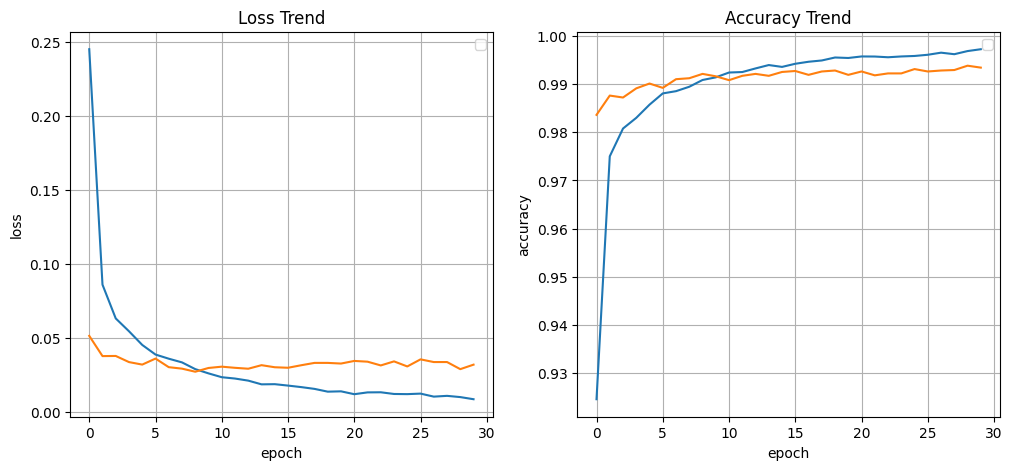

In [10]:
# model trend
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Loss Trend')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.subplot(1, 2, 2)
plt.title('Accuracy Trend')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.show()

## <span style="font-size:25px">CNN Example - Fashion MNIST</span>

### <span style="font-size:18px">위 코드와 동일</span>

In [14]:
# MNIST 데이터 불러오기

from tensorflow.keras.datasets import fashion_mnist

(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print(x_train.shape, x_test.shape)
print(t_train.shape, t_test.shape)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
cnn = Sequential()
cnn.add(Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), 
               filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3, 3), 
               filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))
cnn.compile(loss='sparse_categorical_crossentropy', 
            optimizer=Adam(), 
            metrics=['accuracy'])

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


### <span style="font-size:18">Fashion MNIST START</span>

In [15]:
hist = cnn.fit(x_train, t_train, batch_size=128, epochs=30, validation_data=(x_test, t_test))

Epoch 1/30
469/469 [==============================] - 74s 157ms/step - loss: 0.5133 - accuracy: 0.8176 - val_loss: 0.3363 - val_accuracy: 0.8783
Epoch 2/30
469/469 [==============================] - 4s 9ms/step - loss: 0.3391 - accuracy: 0.8785 - val_loss: 0.2815 - val_accuracy: 0.8989
Epoch 3/30
469/469 [==============================] - 4s 9ms/step - loss: 0.2947 - accuracy: 0.8927 - val_loss: 0.2658 - val_accuracy: 0.9018
Epoch 4/30
469/469 [==============================] - 4s 9ms/step - loss: 0.2596 - accuracy: 0.9046 - val_loss: 0.2383 - val_accuracy: 0.9146
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.2342 - accuracy: 0.9146 - val_loss: 0.2321 - val_accuracy: 0.9174
Epoch 6/30
469/469 [==============================] - 4s 9ms/step - loss: 0.2184 - accuracy: 0.9202 - val_loss: 0.2233 - val_accuracy: 0.9211
Epoch 7/30
469/469 [==============================] - 4s 9ms/step - loss: 0.2003 - accuracy: 0.9269 - val_loss: 0.2241 - val_accuracy: 0.9203
Epo

In [16]:
# 모델 평가

cnn.evaluate(x_test, t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3056 - accuracy: 0.9341


[0.30563589930534363, 0.9340999722480774]

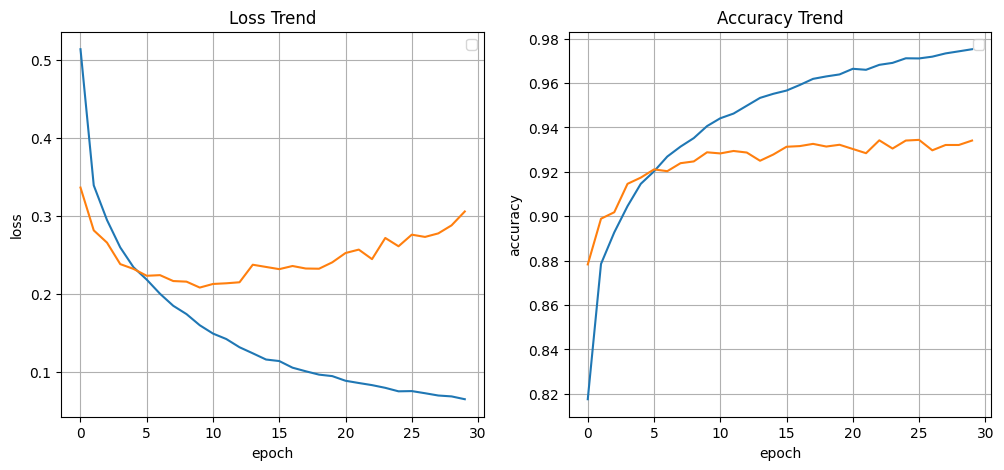

In [17]:
# model trend
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Loss Trend')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.subplot(1, 2, 2)
plt.title('Accuracy Trend')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.show()